In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json('../data/data_dec_2017_clean.json')

# Time periods

In [3]:
time_periods = [(1961, 1972), (1981, 1984),
                (1984, 1993), (1987, 1999),
                (1995, 2015), (2012, 2017),
                (2015, 2017)]

In [4]:
measures = []
for time in time_periods:
    start_date = time[0]
    end_date = time[1]
    
    temp = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    measures.append((len(temp['title'].unique()), len(temp['author'].unique())))

In [5]:
measures

[(21, 38), (5, 6), (64, 70), (121, 169), (926, 1730), (453, 1008), (180, 466)]

In [6]:
table = pd.DataFrame(measures, columns={'Unique articles', 'Unique authors'}).to_latex()

In [26]:
file = open("/home/nightwing/rsc/Literature-Article/assets/summary_temporal.tex", 'w')
file.write('{}'.format(table))
file.close()

In [7]:
import networkx as nx
import itertools

import collections

In [46]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [8]:
def construct_graph(data):
    
    pairs = []
    for _, d in data.groupby('unique_key'):
        pairs += tuple(sorted(list(itertools.combinations(d['author'].unique(), 2))))
        co_authors = collections.Counter(pairs)
        
    authors_num_papers = data.groupby(['author', 'unique_key']).size().reset_index().groupby('author').count()
    authors_num_papers = authors_num_papers.drop(0, axis=1)  
    
    G = nx.Graph()
    _ = [G.add_node(name) for name in data.author]
    _ = [G.add_edge(*pair[0], weight=pair[1]) for pair in co_authors.items()]
    
    return G

In [9]:
measures = []
graphs = []
for time in time_periods:
    start_date = time[0]
    end_date = time[1]
    
    temp = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    graphs.append(construct_graph(temp))

In [10]:
len(graphs)

7

In [35]:
for i in range(len(time_periods)):
    print(r'period {} & {} & {} \\'.format(i + 1, round(con_c[i], 2), round(cc[i], 2)))

period 1 & 15 & 0.5 \\
period 2 & 5 & 0.0 \\
period 3 & 49 & 0.14 \\
period 4 & 96 & 0.3 \\
period 5 & 534 & 0.64 \\
period 6 & 281 & 0.74 \\
period 7 & 134 & 0.76 \\


In [12]:
con_c = []
cc = []
distributions = []
for g in graphs:
    con_c.append(nx.number_connected_components(g))
    cc.append(nx.average_clustering(g))
    distributions.append([sorted([d for n, d in g.degree()], reverse=True)])

In [50]:
font = {'weight': 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

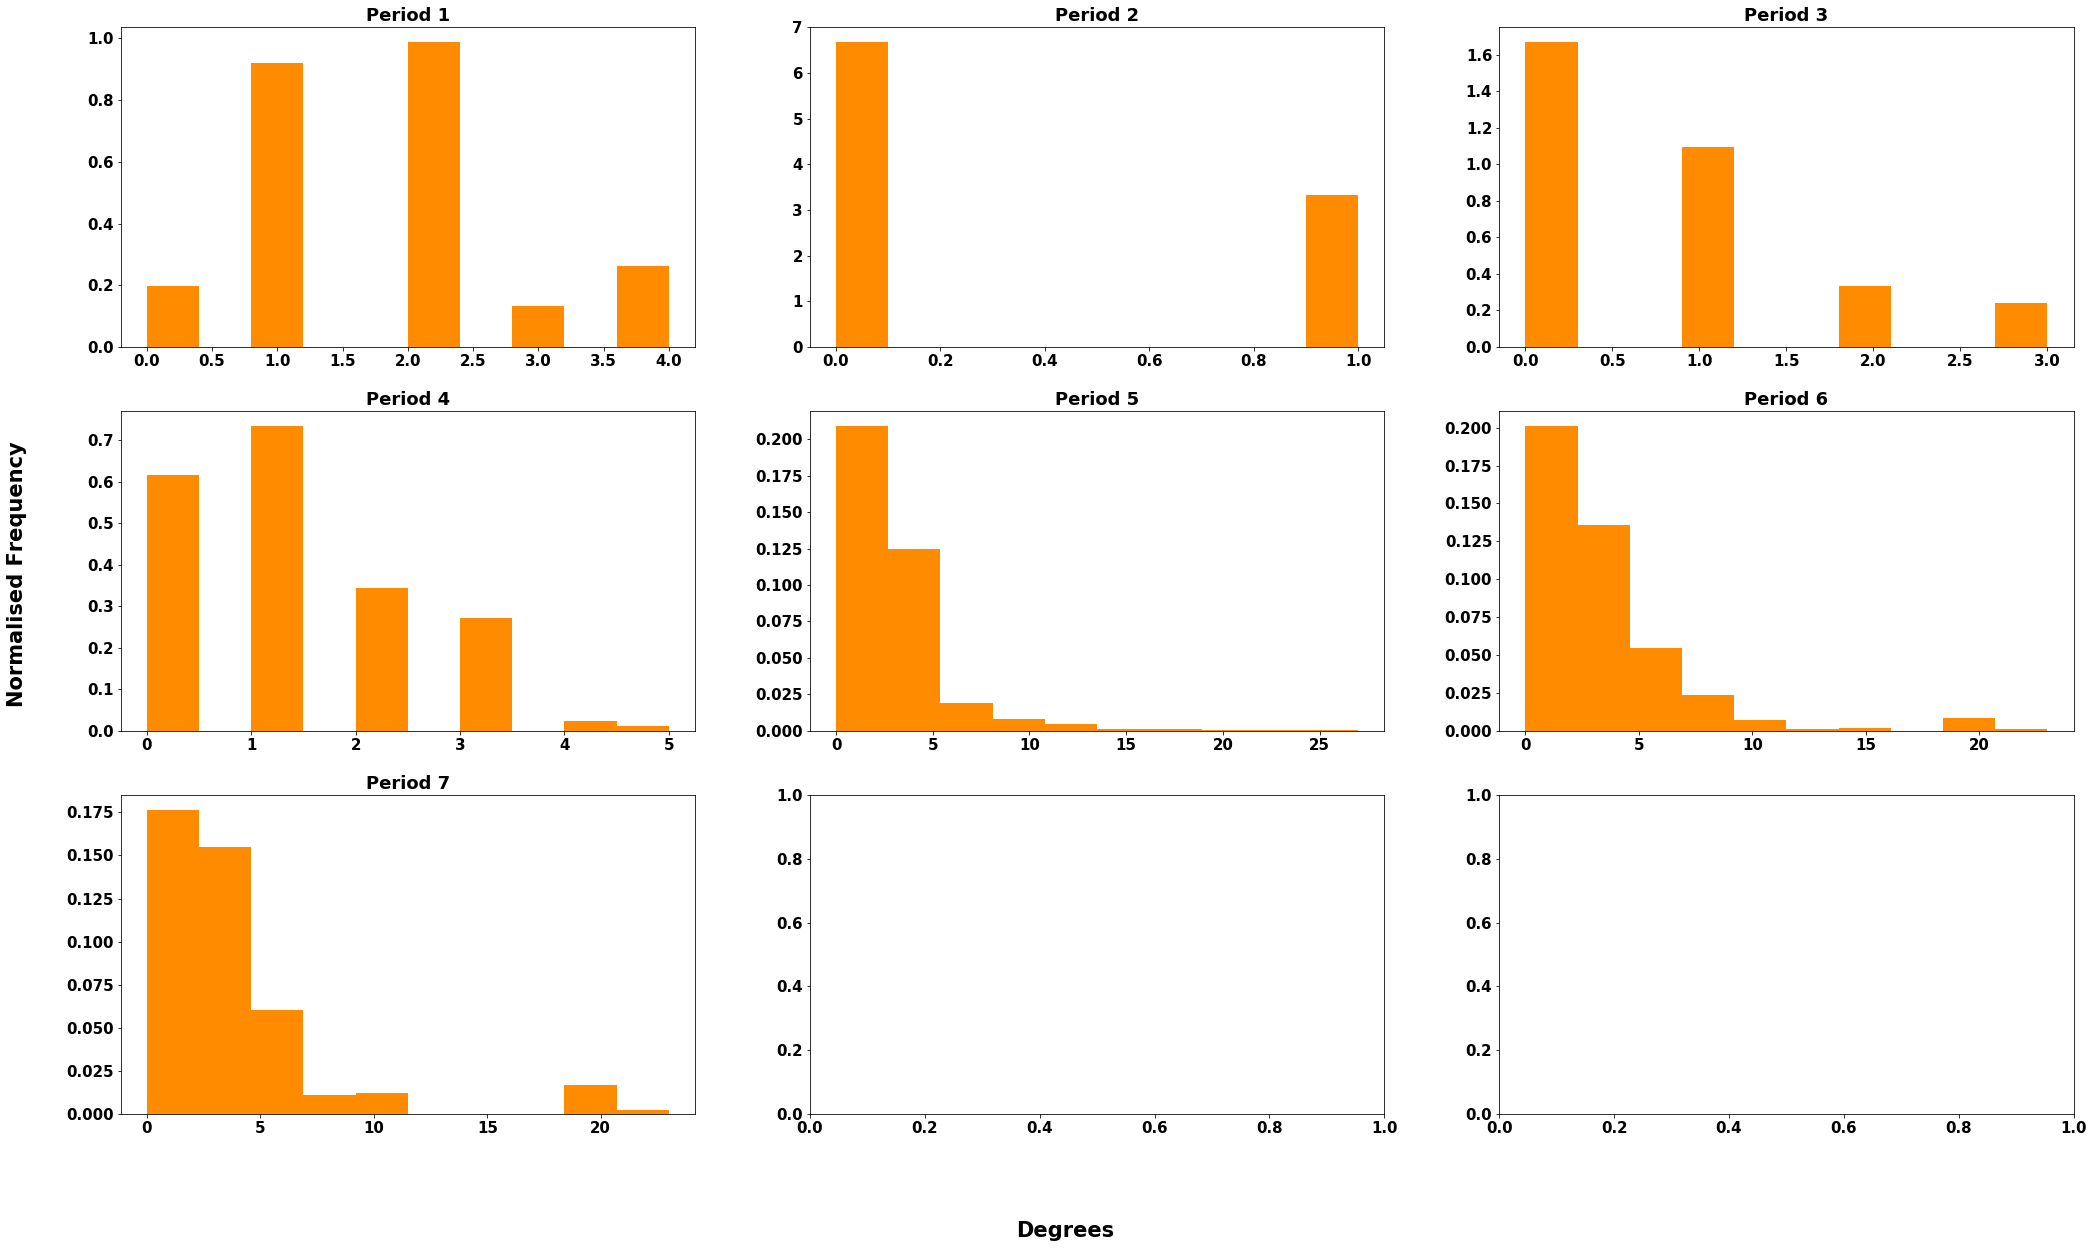

In [62]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 20))
i = 1
for dist, index in zip(distributions, [(0, 0), (0, 1), (0, 2),
                                       (1, 0), (1, 1), (1, 2),
                                       (2, 0)]):
    axes[index].hist(dist, color='darkorange', normed=True);
    axes[index].set_title("Period {}".format(i), fontweight='bold')
    i += 1
fig.text(0.5, 0.04, 'Degrees', ha='center', fontsize=21)
fig.text(0.08, 0.5, 'Normalised Frequency', va='center', rotation='vertical', fontsize=21);

plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/degrees_histrograms_temporal.pdf', format='pdf', bbox_inches='tight')